In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r"D:\DSML\6. Machine Learning\loan_data-1.csv")
print("Data Loaded Successfully! Shape -> ", df.shape)
df.head()

Data Loaded Successfully! Shape ->  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
# Drop Loan_ID
df = df.drop(['Loan_ID'], axis=1)

In [41]:
# Drop rows with missing values
df = df.dropna()

In [43]:
#Converting categorical variables into numerical format
df['Gender'] = df['Gender'].map({"Male" : 1, "Female" : 0})
df['Married'] = df['Married'].map({"Yes" : 1, "No" : 0})
df['Education'] = df['Education'].map({"Graduate" : 1, "Not Graduate" : 0})
df['Dependents']=df['Dependents'].replace('3+', 3)
df['Self_Employed'] = df['Self_Employed'].map({"Yes" : 1, "No" : 0})
df['Property_Area'] = df['Property_Area'].map({"Semiurban" : 1, "Urban" : 2, "Rural" : 3})
df['Loan_Status'] = df['Loan_Status'].map({"Y" : 1, "N" : 0})

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [47]:
#Separating features (X) and target variable (y)
X = df.drop(columns=['Loan_Status']).values
y = df['Loan_Status'].values
# Convery to numpy array of type float
X = X.astype(float)
y = y.astype(float)
print("X Shape -> ", X.shape)
print("y Shape -> ", y.shape)

X Shape ->  (480, 11)
y Shape ->  (480,)


In [49]:
# print(X[:5])
# print(y[:5])

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)
print("X_train Shape -> ", X_train.shape)
print("y_train Shape -> ", y_train.shape)
print("X_test Shape -> ", X_test.shape)
print("y_test Shape -> ", y_test.shape)

X_train Shape ->  (384, 11)
y_train Shape ->  (384,)
X_test Shape ->  (96, 11)
y_test Shape ->  (96,)


In [53]:
# Feature Normalization (DOn't use sklearn's StandardScaler)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

Accuracy: 76.04%
Notice the loss function is decreasing with each iteration...


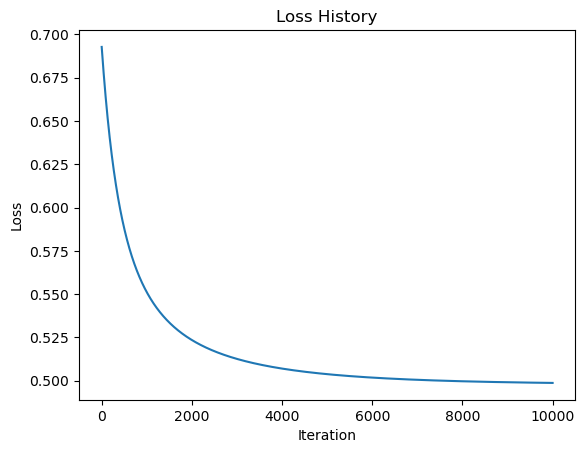

In [55]:
### Using Batch Gradient Descent

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, weights):
    z = np.dot(X, weights)
    h = sigmoid(z)
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Define the gradient descent function
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    loss_history = []
    for i in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
        loss = cost_function(X, y, weights)
        loss_history.append(loss)
    return weights, loss_history

# Define the fit_logistic_regression function
def fit_logistic_regression(X, y, learning_rate, num_iterations):
    weights = np.zeros(X.shape[1])
    weights, loss_history = gradient_descent(X, y, weights, learning_rate, num_iterations)
    return weights, loss_history

# Define the predict_logistic_regression function
def predict_logistic_regression(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z) > 0.5

# Fit the model
weights, loss_history = fit_logistic_regression(X_train, y_train, learning_rate=0.005, num_iterations=10000)

# Evaluate the model
y_pred = predict_logistic_regression(X_test, weights)
accuracy = (y_pred == y_test).mean()
# print accuracy as percentage upto 2 decimal places
print(f'Accuracy: {accuracy * 100:.2f}%')


print("Notice the loss function is decreasing with each iteration...")
# Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Accuracy: 77.08%
Notice the likelihood is increasing with each iteration...


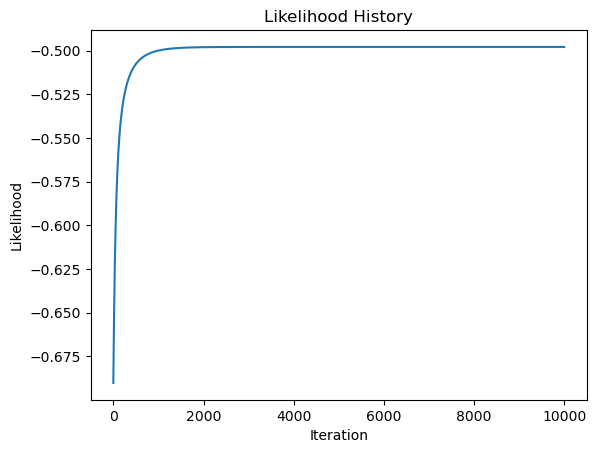

In [57]:
### Now, using stochastic gradient ascent ###
# New cost function - log likelihood
def log_likelihood(X, y, weights):
    z = np.dot(X, weights)
    h = sigmoid(z)
    return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

# New gradient ascent function
def gradient_ascent(X, y, weights, learning_rate, num_iterations):
    likelihood_history = []
    for i in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (y - h))
        weights += learning_rate * gradient
        likelihood = log_likelihood(X, y, weights)
        likelihood_history.append(likelihood)
    return weights, likelihood_history

# Function to fit the logistic regression model using stochastic gradient ascent
def fit_logistic_regression_stochastic(X, y, learning_rate, num_iterations):
    weights = np.zeros(X.shape[1])
    weights, likelihood_history = gradient_ascent(X, y, weights, learning_rate, num_iterations)
    return weights, likelihood_history

# Fit the model
weights, likelihood_history = fit_logistic_regression_stochastic(X_train, y_train, learning_rate=0.0001, num_iterations=10000)

# Evaluate the model
y_pred = predict_logistic_regression(X_test, weights)
accuracy = (y_pred == y_test).mean()
# print accuracy as percentage upto 2 decimal places
print(f'Accuracy: {accuracy * 100:.2f}%')

print("Notice the likelihood is increasing with each iteration...")

# Plot the likelihood history
plt.plot(likelihood_history)
plt.title('Likelihood History')
plt.xlabel('Iteration')
plt.ylabel('Likelihood')
plt.show()

Confusion Matrix:
[[13 20]
 [ 2 61]]


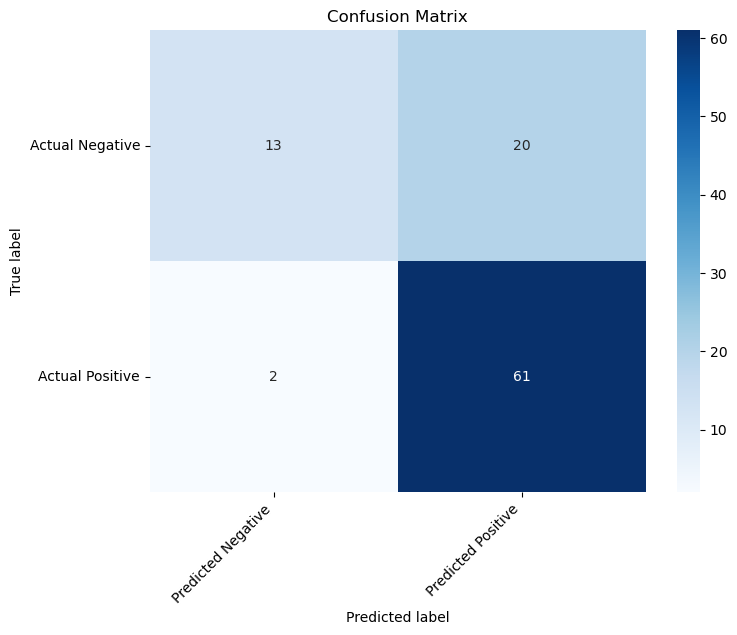

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [61]:
# print colum names with index
for i, column in enumerate(df.columns[:-1]):
    print(i, column)

0 Gender
1 Married
2 Dependents
3 Education
4 Self_Employed
5 ApplicantIncome
6 CoapplicantIncome
7 LoanAmount
8 Loan_Amount_Term
9 Credit_History
10 Property_Area


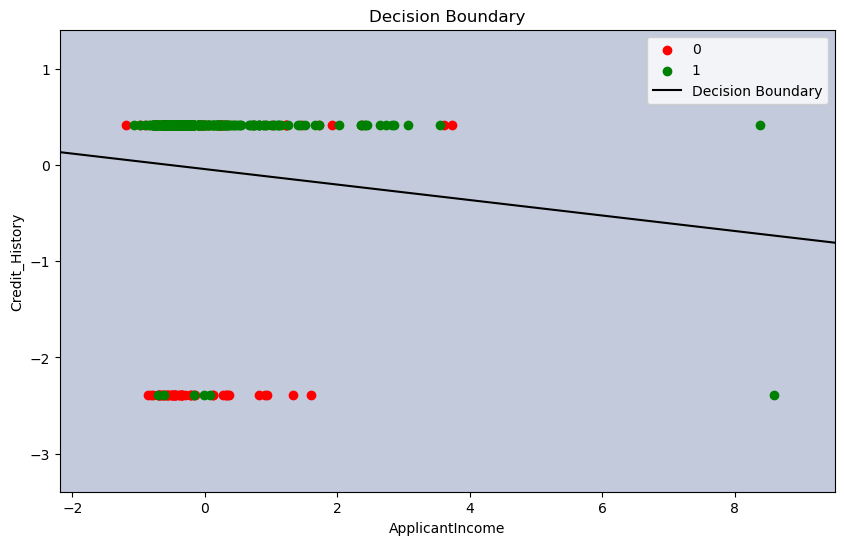

In [63]:
# Drawing decision boundary using feature idx_1 and idx_2
idx_1 = 5
idx_2 = 9

# Create a meshgrid of points covering the feature space
x_min, x_max = X_train[:, idx_1].min() - 1, X_train[:, idx_1].max() + 1
y_min, y_max = X_train[:, idx_2].min() - 1, X_train[:, idx_2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the meshgrid
Z = np.c_[xx.ravel(), yy.ravel()]

# Normalize the meshgrid
Z = (Z - mean[idx_1]) / std[idx_1]
Z = (Z - mean[idx_2]) / std[idx_2]

# Create a new weight array with only the weights corresponding to idx_1 and idx_2
weights_subset = weights[[idx_1, idx_2]]

# Calculate the predicted probabilities for the points in the meshgrid
Z_pred = predict_logistic_regression(Z, weights_subset)
Z_pred = Z_pred.reshape(xx.shape)

# Plot a clear decision boundary at p = 0.5 figure size (10, 6)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_pred, alpha=0.3)
plt.scatter(X_train[y_train == 0, idx_1], X_train[y_train == 0, idx_2], color='r', label='0')
plt.scatter(X_train[y_train == 1, idx_1], X_train[y_train == 1, idx_2], color='g', label='1')

# Plot the decision boundary curve
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(weights[0] + weights[idx_1] * x_vals) / weights[idx_2]
plt.plot(x_vals, y_vals, label='Decision Boundary', color='k')

plt.xlabel(df.columns[idx_1])
plt.ylabel(df.columns[idx_2])
plt.legend()
plt.title('Decision Boundary')
plt.show()

              feature  importance percentage_importance_str
9      Credit_History    2.183314                    59.16%
10      Property_Area    0.321965                     8.72%
1             Married    0.267740                     7.25%
7          LoanAmount    0.217598                      5.9%
5     ApplicantIncome    0.175533                     4.76%
4       Self_Employed    0.111646                     3.03%
2          Dependents    0.106941                      2.9%
3           Education    0.105898                     2.87%
0              Gender    0.094271                     2.55%
6   CoapplicantIncome    0.066103                     1.79%
8    Loan_Amount_Term    0.039567                     1.07%


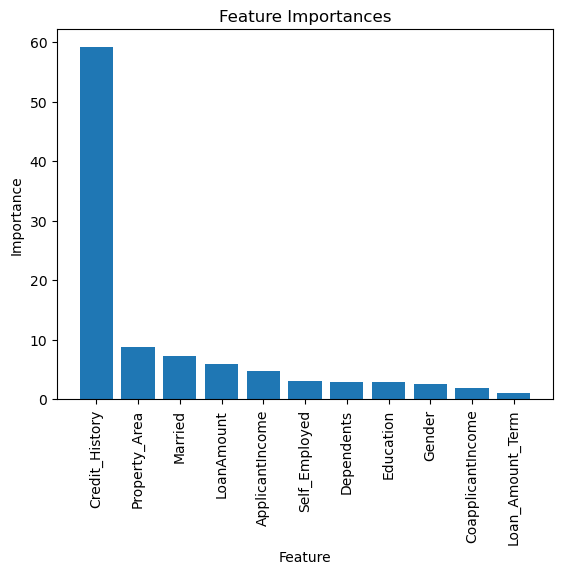

In [65]:
# Get the feature names from the DataFrame
feature_names = df.columns[:-1]

# Calculate the importance of each feature
feature_importances = np.abs(weights)

# Create a DataFrame with the feature names and their importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Calculate the percentage importance
total_importance = importance_df['importance'].sum()
importance_df['percentage_importance'] = (importance_df['importance'] / total_importance) * 100
importance_df['percentage_importance_str'] = importance_df['percentage_importance'].round(2).astype(str) + '%'

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Print the DataFrame (don;t print column percentage_importance)
print(importance_df.drop(columns='percentage_importance'))

# Plot the feature importances
fig, ax = plt.subplots()
ax.bar(importance_df['feature'], importance_df['percentage_importance'])
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
plt.xticks(rotation=90)
plt.show()